In [1]:
from JuRunPlatform import StrategyPlatform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors 

def zscorer(row):
    aver=row.mean()
    stdv=row.std(ddof=0)
    return (row-aver)/stdv

sp1=(StrategyPlatform(useSubUniverse=True,subUnivName='HS300'))
sp1.SetDate(2010101,20181031)
close1=sp1.LoadDF('close').fillna(method='ffill').fillna(0)
open1=sp1.LoadDF('open').fillna(method='ffill').fillna(0)
high1=sp1.LoadDF('high').fillna(method='ffill').fillna(0)
low1=sp1.LoadDF('low').fillna(method='ffill').fillna(0)
volume1=sp1.LoadDF('volume').fillna(method='ffill').fillna(0)
ATOT=sp1.LoadDF('rating_instnum').fillna(0).apply(lambda row:zscorer(row),axis=1)
rreturns=(close1-close1.shift(1))/close1.shift(1)
vwap1=sp1.LoadDF('vwap').fillna(method='ffill')
rankopen=open1.rank(1,ascending=True,method='first')
rankvolume=volume1.rank(1,ascending=True,method='first')

Data Loaded...
Data Loaded...


In [2]:
# a9=-1*pd.rolling_corr(high1,rankvolume,5).apply(lambda row:zscorer(row),axis=1)
sales=sp1.LoadDF('west_sales_FY2')
sales=sales.fillna(0).apply(lambda row:zscorer(row),axis=1)
# netprofit1=sp1.LoadDF('west_netprofit_FY1').fillna(0)
netprofit2=sp1.LoadDF('west_netprofit_FY2').fillna(0).apply(lambda row:zscorer(row),axis=1)
# west_eps_FY2=sp1.LoadDF('west_eps_FY2').fillna(0).apply(lambda row:zscorer(row),axis=1)
# mrg_short_bal=sp1.LoadDF('mrg_short_bal').fillna(0).apply(lambda row:zscorer(row),axis=1)
targetprice_avg_wp30=sp1.LoadDF('targetprice_avg_wp30').fillna(0).apply(lambda row:zscorer(row),axis=1)
west_avgcps_FY1=sp1.LoadDF('west_avgcps_FY1').fillna(0).apply(lambda row:zscorer(row),axis=1)
#beta_100w=sp1.LoadDF('beta_100w').fillna(0).apply(lambda row:zscorer(row),axis=1)
mkt_cap_ashare=sp1.LoadDF('mkt_cap_ashare').fillna(0).apply(lambda row:zscorer(row),axis=1)
#beta_100w=-1*beta_100w

In [3]:
net_profit_is=sp1.LoadDF('net_profit_is').fillna(method='ffill').apply(lambda row:zscorer(row),axis=1)
# tradable_fin_liab=sp1.LoadDF('tradable_fin_liab').fillna(method='ffill').apply(lambda row:zscorer(row),axis=1)
# qfa_yoyprofit=sp1.LoadDF('qfa_yoyprofit').fillna(method='ffill').apply(lambda row:zscorer(row),axis=1)
# tot_cur_assets=sp1.LoadDF('tot_cur_assets').fillna(method='ffill').apply(lambda row:zscorer(row),axis=1)
# tot_liab=sp1.LoadDF('tot_liab').fillna(method='ffill').apply(lambda row:zscorer(row),axis=1)
# leverage=tot_liab/tot_cur_assets

In [4]:
factors=[sales,netprofit2,targetprice_avg_wp30,west_avgcps_FY1,mkt_cap_ashare,net_profit_is]

def decision(factors):
    ret=[]
    for i in range(len(factors)):
        ret.append(factors[i].shift(1).applymap(lambda x:1 if x>0 else -1))
    return ret

decisions=decision(factors)

realmovement=rreturns.applymap(lambda x:1 if x>0 else -1)




In [5]:
rreturns


,000001.SZ,000002.SZ,000009.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,000063.SZ,000069.SZ,...,601958.SH,601985.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,603000.SH,603885.SH,603993.SH
20101008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101011.0,0.047619,0.047393,0.012366,0.063029,0.028986,0.026345,0.100000,0.047273,-0.013333,0.034348,...,0.034607,NaN,0.011834,0.006772,0.034632,NaN,0.037736,NaN,NaN,NaN
20101012.0,-0.003880,-0.004525,-0.041531,0.023894,0.003841,-0.005348,0.100000,-0.025608,0.009653,0.000000,...,0.043435,NaN,0.000000,0.001121,0.013947,NaN,-0.012727,NaN,NaN,NaN
20101013.0,0.031720,0.068182,0.024639,-0.019879,0.038903,0.079570,0.074866,-0.026281,0.000000,0.056604,...,0.014833,NaN,0.008772,-0.007839,-0.013755,NaN,0.036832,NaN,NaN,NaN
20101014.0,-0.010787,0.000000,-0.071310,-0.018519,-0.021486,-0.023904,0.031208,-0.030192,-0.024092,-0.014286,...,0.099953,NaN,0.014493,-0.010158,0.004184,NaN,0.019538,NaN,NaN,NaN
20101015.0,0.044166,0.015957,0.007143,0.026056,0.031995,0.013265,-0.005263,0.010849,0.006661,0.028986,...,0.078868,NaN,0.042857,0.088940,0.036111,NaN,0.074913,NaN,NaN,NaN
20101018.0,0.001044,0.008377,-0.029255,0.027145,-0.035866,0.002014,-0.085538,-0.049463,0.030751,-0.007042,...,-0.098927,NaN,-0.008219,-0.009424,0.012064,NaN,0.006483,NaN,NaN,NaN
20101019.0,0.019823,-0.013499,0.053881,-0.002558,0.027112,0.000000,0.035198,0.035837,0.038520,-0.008511,...,0.022487,NaN,0.000000,0.033827,0.003974,NaN,-0.003221,NaN,NaN,NaN
20101020.0,-0.004092,-0.061053,0.032929,0.005128,0.029466,-0.062312,-0.011644,0.040284,0.033455,-0.070100,...,-0.028461,NaN,-0.002762,-0.015337,-0.029024,NaN,-0.008078,NaN,NaN,NaN
20101021.0,-0.031844,-0.003363,0.010906,-0.009354,-0.005367,0.024652,0.000000,0.004556,-0.010204,0.008462,...,0.025300,NaN,-0.016620,-0.021807,0.002717,NaN,-0.032573,NaN,NaN,NaN


In [5]:
alpha0=sp1.LoadZeroAlpha()

x=[]
volume1=volume1.apply(lambda row:zscorer(row),axis=1)
close1=close1.apply(lambda row:zscorer(row),axis=1)
open1=open1.apply(lambda row:zscorer(row),axis=1)
low1=low1.apply(lambda row:zscorer(row),axis=1)
high1=high1.apply(lambda row:zscorer(row),axis=1)

basic=[close1,open1,high1,low1,volume1]
for i in range(close1.shape[0]):
    for j in range(close1.shape[1]):
        temp=[]
        for m in range(5):
            temp.append(basic[m].iloc[i,j])
        x.append(temp)

len(x)-close1.shape[0]*close1.shape[1]
    

0

In [28]:
np.save('x.npy',x)

In [40]:
# tags=[]

# tag=decisions[0].fillna(0)-realmovement
# for i in range(tag.shape[0]):
#     for j in range(tag.shape[1]):
#         tags.append(tag.iloc[i,j])


In [41]:
# ppp=[]
# for i in range(close1.shape[0]):
#     if i==0:
#         pp=[0 for i in range(close1.shape[1])]
#         ppp.append(pp)
#         continue
#     if i<=20:
#         x0=pd.DataFrame(x[0:close1.shape[1]*(i)]).fillna(0)
#         y0=pd.DataFrame(tags[0:close1.shape[1]*(i)]).fillna(0)
#     else:
#         x0=pd.DataFrame(x[close1.shape[1]*(i-20):close1.shape[1]*(i)]).fillna(0)
#         y0=pd.DataFrame(tags[close1.shape[1]*(i-20):close1.shape[1]*(i)]).fillna(0)
#     model.fit(x0,y0)
#     pp=model.predict(pd.DataFrame(x[close1.shape[1]*(i):close1.shape[1]*(i+1)]).fillna(0))
#     ppp.append(pp)


    

In [42]:
# sorter=[net_profit_is,tradable_fin_liab,qfa_yoyprofit,tot_cur_assets,tot_liab]
# def myfiltsort(sorter):
#     zeroalpha=sp1.LoadZeroAlpha()
#     for factor in sorter:


# ppp[0]=np.array(ppp[0])
# ppp=np.stack(ppp)

# weight=np.zeros_like(ppp)
# for i in range(ppp.shape[0]):
#     for j in range(ppp.shape[1]):
#         if ppp[i,j]==0:
#             weight[i,j]=1
#         else:
#             weight[i,j]=0


In [43]:
# alphai=sp1.LoadZeroAlpha()
# alphai=np.array(decisions[0])*weight
# sp1.GeneratePerformance(alphai)

In [44]:
# decisions[0]

In [6]:
T=close1.shape[0]
N=close1.shape[1]


In [7]:
tags=[]
tag=[]
for i in range(len(decisions)):
    tag.append(decisions[0].fillna(0)-realmovement)



In [8]:
for m in range(len(tag)):
    tag[m]=tag[m].applymap(lambda x:0 if x==0 else 1)


[0]

In [11]:
pp=[]
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
for m in range(len(tag)):
    tempp=np.zeros_like(close1)
    for t in range(T):
        for n in range(N):
            if t<=5:
                tempp[t,n]=0
                continue
            x0=[x[(tt)*N+n] for tt in range(t-5,t)]
            y0=tag[m].iloc[t-5:t,n]
            model.fit(x0,y0)
            tempp[t,n]=model.predict([x[t*N+n]])
    pp.append(tempp)
    
    
                
                


                        Sharpe       Return  MaxDrawdown     Turnover
20101011-20101231          nan         0.00         0.00          0.0
20110104-20111230          nan         0.00         0.00          0.0
20120104-20121231          nan         0.00         0.00          0.0
20130104-20131231       -1.628       -38.79       -44.61        100.2
20140102-20141231        1.179        27.59       -27.15        108.8
20150105-20151231       -0.479       -20.59       -61.33        103.1
20160104-20161230       -0.600       -11.39       -27.80        100.6
20170103-20171229        1.052        13.33       -13.71        102.7
20180102-20180619       -0.642       -12.43       -25.62        110.1

20101011-20180619       -0.206        -4.49       -62.07         73.4


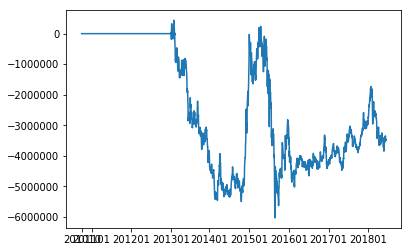

In [12]:
alpha=sp1.LoadZeroAlpha()
for m in range(len(pp)):
    for i in range(T):
        for j in range(N):
            alpha[i,j]+=decisions[m].iloc[i,j]*(1-pp[m][i,j])
sp1.GeneratePerformance(alpha)

In [ ]:
# for t in range(len(tag)):
#     temptag=[]
#     for i in range(tag[t].shape[0]):
#         for j in range(tag[t].shape[1]):
#             if tag[t].iloc[i,j]==0:
#                 temptag.append(0)
#             else:
#                 temptag.append(1)
#     tags.append(temptag)

In [ ]:
ppp=[]
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
for m in range(len(tags)):
    tempppp=[]
    for i in range(close1.shape[0]):
        if i==0:
            pp=np.array([0 for i in range(close1.shape[1])])
            tempppp.append(pp)
            continue
        if i<=20:
            x0=pd.DataFrame(x[0:close1.shape[1]*(i)]).fillna(0)
            y0=pd.DataFrame(tags[m][0:close1.shape[1]*(i)]).fillna(0)
        else:
            x0=pd.DataFrame(x[close1.shape[1]*(i-20):close1.shape[1]*(i)]).fillna(0)
            y0=pd.DataFrame(tags[m][close1.shape[1]*(i-20):close1.shape[1]*(i)]).fillna(0)
    
        model.fit(x0,y0)
        pp=model.predict(pd.DataFrame(x[close1.shape[1]*(i):close1.shape[1]*(i+1)]).fillna(0))
        tempppp.append(pp)
    tempppp=np.stack(tempppp)
    ppp.append(tempppp)        

np.save('ppp.npy',ppp)
# ppp[0]=np.array(ppp[0])
# ppp=np.stack(ppp)



In [ ]:
weight=[np.zeros_like(ppp[0]) for i in range(len(ppp))]
for m in range(len(ppp)):
    for i in range(ppp[m].shape[0]):
        for j in range(ppp[m].shape[1]):
            if ppp[m][i,j]==0:
                weight[m][i,j]=1
            else:
                weight[m][i,j]=0
alphaaa=sp1.LoadZeroAlpha()
for i in range(alphaaa.shape[0]):
    for j in range(alphaaa.shape[1]):
        for m in range(len(decisions)):
            alphaaa[i][j]+=decisions[m].iloc[i,j]*weight[m][i,j]
np.save('alphaaa.npy',alphaaa)
sp1.GeneratePerformance(alphaaa)

In [ ]:
sp1.SetTradingCost(0)
sp1.GeneratePerformance(alphaaa)


In [ ]:
sp1.SetDate(20160101,20181031)
cc=sp1.LoadDF('close')
alphacc=alphaaa[-1*cc.shape[0]:]
sp1.GeneratePerformance(alphacc)

In [ ]:
alphbbb=np.zeros_like(alphaaa)
for i in range(alphaaa.shape[0]):
    for j in range(alphaaa.shape[1]):
        if alphaaa[i,j]<=0:
            alphbbb[i,j]=0
        else:
            alphbbb[i,j]=alphaaa[i,j]
sp1.SetDate(2010101,20181031)
sp1.GeneratePerformance(alphbbb)
